# Assignment 1 - Normalizing Continuous Features

Consider data drawn from a 2 dimensional Normal distribution. 
Normalize the data by first subtracting the mean from each dimension and then divide the result by its respective standard deviation. 

(-10, 10)

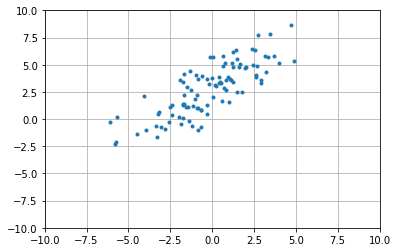

In [1]:
import matplotlib.pylab as plt
import numpy as np
from numpy.random import multivariate_normal as mvn
%matplotlib inline

# generates some toy data
mu = np.array([0,3])
C = np.array([[5.,4.],[4.,5.]])
X = mvn(mu,C,100)

# plot the data
plt.plot(X[:,0], X[:,1], '.')
plt.grid()
lim = [-10, 10]
plt.xlim(lim)
plt.ylim(lim)

In [3]:
mu = X.mean(axis=0)
mu

array([-0.47603054,  2.71000698])

In [4]:
stdev = X.std(axis=0)
stdev

array([1.98633712, 2.3232049 ])

In [5]:
# normalizing data to standard deviation with the z-scoring method
Xnormalized = (X-mu)/np.std(X, axis=0)

(-10, 10)

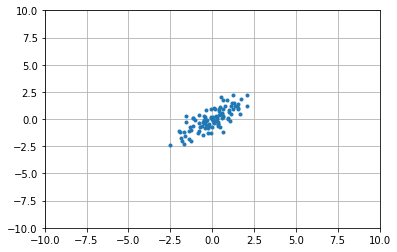

In [6]:
# plot the data
plt.plot(Xnormalized[:,0], Xnormalized[:,1], '.')
plt.grid()
lim = [-10, 10]
plt.xlim(lim)
plt.ylim(lim)

# Assignment 2 - One-Hot Encoding

Consider the data set ['blue', 'yellow', 'blue', 'green', 'red', 'yellow']

Write a function ``one_hot_encoding`` that takes a list of strings like the above and returns a samples-by-unique-items numpy array in which each row corresponds to the one-hot-encoded version of the respective data point in the original list.

In [7]:
data = ['blue', 'yellow', 'blue', 'green', 'red', 'yellow']

In [8]:
def one_hot_encoding_didactic(string_list):
    unique_list = np.unique(string_list)            # creates a unique list from the string list
    onehot = []
    for string in string_list:                      
        onehot_element = 1*(unique_list == string)  # checks what unique element matches current string and converts into integer vector, which is the one hot coding  
        onehot.append(onehot_element)               # appends each one hot coding to a list
    onehot = np.array(onehot)
    return onehot

def one_hot_encoding(string_list):
    return np.array([1*(np.unique(string_list)==string) for string in string_list])

In [9]:
one_hot_encoded_data = one_hot_encoding(data)
one_hot_encoded_data

array([[1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [10]:
# tests whether the first row encoding is the same as the third
assert (one_hot_encoded_data[0,:] - one_hot_encoded_data[2,:]).sum() == 0
# tests whether the second row encoding is the same as the last
assert (one_hot_encoded_data[1,:] - one_hot_encoded_data[-1,:]).sum() == 0
# tests whether each row has only one non-zero entry
assert (one_hot_encoded_data.sum(axis=1) - np.ones(one_hot_encoded_data.shape[0])).sum() == 0